In [107]:
import numpy
import cv2
import math
from matplotlib import pyplot as plt

# define avaliable interpolation methods
interpolationMethods = {
         0: cv2.INTER_NEAREST, 
         1: cv2.INTER_LINEAR, 
         2: cv2.INTER_CUBIC
}

# open image (unused)
def open_image(img):
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# return largest inscribed rectangle (http://qaru.site/questions/121230/rotate-image-and-crop-out-black-borders)
def largest_rotated_rect(w, h, angle):

    quadrant = int(math.floor(angle / (math.pi / 2))) & 3
    sign_alpha = angle if ((quadrant & 1) == 0) else math.pi - angle
    alpha = (sign_alpha % math.pi + math.pi) % math.pi

    bb_w = w * math.cos(alpha) + h * math.sin(alpha)
    bb_h = w * math.sin(alpha) + h * math.cos(alpha)

    gamma = math.atan2(bb_w, bb_w) if (w < h) else math.atan2(bb_w, bb_w)

    delta = math.pi - alpha - gamma

    length = h if (w < h) else w

    d = length * math.cos(alpha)
    a = d * math.sin(alpha) / math.sin(delta)

    y = a * math.cos(gamma)
    x = y * math.tan(gamma)

    return (
        bb_w - 2 * x,
        bb_h - 2 * y
    )
   
# rotate image
def rotate_img(img, angle):
    
    # get image size
    (height, width) = img.shape[:2]
    
    # get center coords
    (center_x, center_y) = (width // 2, height // 2)
    
    # normalize an input angle
    angle %=360
 
    # get opencv rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), angle, 1.0)

    ## update width and height
    new_width, new_height = largest_rotated_rect(width, height, angle)
    new_width = int(new_width)
    new_height = int(new_height)

    ## update rotation matrix
    rotation_matrix[0, 2] += (new_width / 2) - center_x
    rotation_matrix[1, 2] += (new_height / 2) - center_y
    
    ## apply affine transformation and return result
    result_img = cv2.warpAffine(img, rotation_matrix, (new_width, new_height))
    
    return result_img

# crop image (http://qaru.site/questions/121230/rotate-image-and-crop-out-black-borders)
def crop_around_center(image, width, height):

    image_size = (image.shape[1], image.shape[0])
    image_center = (int(image_size[0] * 0.5), int(image_size[1] * 0.5))

    if(width > image_size[0]):
        width = image_size[0]

    if(height > image_size[1]):
        height = image_size[1]

    x1 = int(image_center[0] - width * 0.5)
    x2 = int(image_center[0] + width * 0.5)
    y1 = int(image_center[1] - height * 0.5)
    y2 = int(image_center[1] + height * 0.5)

    return image[y1:y2, x1:x2]

# main function for lab1
def execute_image_processing(img, angle, k, interpolation_type):
    # rotate image
    rotated_img = rotate_img(img, angle)
    
    # crop image
    image_height, image_width = rotated_img.shape[0:2]
    cropped_img = crop_around_center(
            rotated_img,
            *largest_rotated_rect(
                image_width,
                image_height,
                angle
            )
    )

    # resize_image
    resized_img = cv2.resize(cropped_img, None, fx = k, fy = 1 / k, interpolation=interpolation_type)

    # return result
    result_img = resized_img
    return result_img
    

Введите абсолютный путь до изображения: /Users/xtail/Projects/LETI/ImageProcessing/labs/lab1/test_files/2.jpg


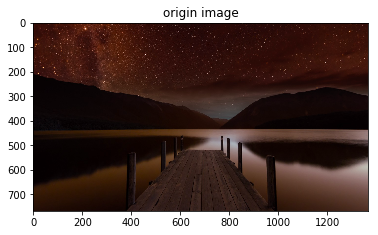

In [72]:
# select image
image_path = input("Введите абсолютный путь до изображения: ")
origin_img = cv2.imread(image_path)

# show selected image
plt.imshow(origin_img)
plt.title("origin image")
plt.show()

Введите угол поворота (в градусах): 30
Введите коэффициент сжатия из диапазона (0;1]: 0.5
Выберите признак интерполяционной схемы (0 – нулевого порядка, 1 – первого порядка, 2 - третьего порядка): 0


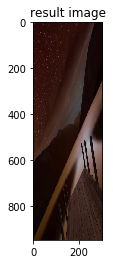

In [113]:
# input data
angle = int(input("Введите угол поворота (в градусах): "))
k = float(input("Введите коэффициент сжатия из диапазона (0;1]: "))
interpolation_type_index = int(input("Выберите признак интерполяционной схемы (0 – нулевого порядка, 1 – первого порядка, 2 - третьего порядка): "))

# process image
result_img = execute_image_processing(origin_img, angle, k, interpolationMethods[interpolation_type_index])

# save results
cv2.imwrite("results/result.bmp", result_img);
#open_image(result_img)

# show image in notebook
plt.imshow(result_img)
plt.title("result image")
plt.show()